In [11]:
from modules import *
from functions.tools import *
from functions.TestFuns import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
mnist_data_train = pd.read_csv('datasets/MNIST/mnist_train.csv').set_index('label')

100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


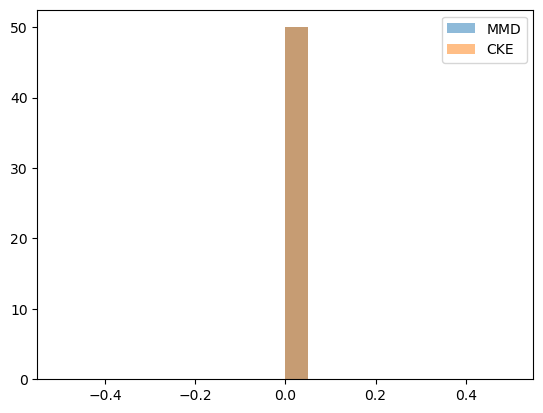

1.0
1.0


In [63]:
num_permutations = 100
n_samples = 50
mmd_pvals = []; cke_pvals = []
# x_num = 8; y_num = 3
x_num = 9; y_num = 5
for _ in tqdm(range(50)):
    X = mnist_data_train.loc[x_num].sample(n_samples).values
    Y = mnist_data_train.loc[y_num].sample(n_samples).values
    MMD_p_value = MMD_two_sample_test(X,Y)(num_permutations); mmd_pvals.append(MMD_p_value)
    CKE_p_value = CKE_two_sample_test(X,Y, kappa_K = 1000)(num_permutations); cke_pvals.append(CKE_p_value)

plt.hist(mmd_pvals, bins = 20, alpha = 0.5, label = 'MMD')
plt.hist(cke_pvals, bins = 20, alpha = 0.5, label = 'CKE')
plt.legend()
plt.show()

print(sum([_<.05 for _ in mmd_pvals])/ len(mmd_pvals))
print(sum([_<.05 for _ in cke_pvals]) / len(cke_pvals))


AttributeError: module 'seaborn' has no attribute 'hist'

0.82
1.0


----

In [48]:
num_permutations = 100
mmd_pvals = []; cke_pvals = []
for x_num in tqdm(range(10), position=1):
    for y_num in tqdm(range(x_num +1, 10), position=2, leave=False):
        X = mnist_data_train.loc[x_num].values[-100:]
        Y = mnist_data_train.loc[y_num].values[-100:]
        MMD_p_value = MMD_two_sample_test(X,Y)(num_permutations); mmd_pvals.append(MMD_p_value)
        CKE_p_value = CKE_two_sample_test(X,Y)(num_permutations); cke_pvals.append(CKE_p_value)


MMD_matrix = np.zeros((10, 10))
CKE_matrix = np.zeros((10, 10))
index = 0
for i in range(10):
    for j in range(i + 1, 10):
        MMD_matrix[i, j] = mmd_pvals[index]; MMD_matrix[j, i] = mmd_pvals[index]
        CKE_matrix[i, j] = cke_pvals[index]; CKE_matrix[j, i] = cke_pvals[index]
        index += 1

fig, [axMMD, axCKE] = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(MMD_matrix, annot=True, ax=axMMD, cmap='coolwarm', cbar=False)
sns.heatmap(CKE_matrix, annot=True, ax=axCKE, cmap='coolwarm', cbar=False)
axMMD.set_title('MMD p-values')
axCKE.set_title('CKE p-values')





  0%|          | 0/10 [00:03<?, ?it/s]


KeyboardInterrupt: 